In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Supervised
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb



## Unsupervised
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


## Semi-Supervised
from sklearn.semi_supervised import LabelSpreading


## Deep Learning
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
# PyTorch
import torch
import torch.nn as nn

# Stardardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Evaluating Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score



In [226]:
df_interest = pd.read_csv('data/data_set.csv')
df_interest.head()

,interest_rate,fico_range,amount_requested,amount_funded_by_investors,loan_length
0,8.90,735-739,20000.0,20000.0,36.0
1,12.12,715-719,19200.0,19200.0,36.0
2,21.98,690-694,35000.0,35000.0,60.0
3,9.99,695-699,10000.0,9975.0,36.0
4,11.71,695-699,12000.0,12000.0,36.0


In [227]:
df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [228]:
df_interest.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length
count,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012
std,4.178007,7801.222483,7743.387861,9.933753
min,5.420000,1000.000000,-0.010000,36.000000
25%,10.160000,6000.000000,6000.000000,36.000000
50%,13.110000,10000.000000,10000.000000,36.000000
75%,15.800000,17000.000000,16000.000000,36.000000
max,24.890000,35000.000000,35000.000000,60.000000


In [229]:
df_interest['fico_range'].unique()

array(['735-739', '715-719', '690-694', '695-699', '670-674', '720-724',
       '705-709', '685-689', '665-669', '725-729', '730-734', '740-744',
       '760-764', '675-679', '765-769', '780-784', '830-834', '660-664',
       '710-714', '785-789', '750-754', '700-704', '680-684', '755-759',
       '790-794', '810-814', '775-779', '815-819', '745-749', '805-809',
       '800-804', '655-659', '770-774', '795-799', '640-644', '645-649',
       '820-824', '650-654'], dtype=object)

In [230]:
df_interest[['fico_low', 'fico_high']] = df_interest['fico_range'].str.split('-', expand=True).astype(int)

df_interest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
 5   fico_low                    2498 non-null   int32  
 6   fico_high                   2498 non-null   int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 117.2+ KB


In [231]:
df_clean_interest = df_interest.drop('fico_range', axis=1)

df_clean_interest


,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high
0,8.90,20000.0,20000.00,36.0,735,739
1,12.12,19200.0,19200.00,36.0,715,719
2,21.98,35000.0,35000.00,60.0,690,694
3,9.99,10000.0,9975.00,36.0,695,699
4,11.71,12000.0,12000.00,36.0,695,699
...,...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,705,709
2494,14.09,16000.0,16000.00,60.0,740,744
2495,13.99,10000.0,10000.00,36.0,680,684
2496,12.42,6000.0,6000.00,36.0,675,679


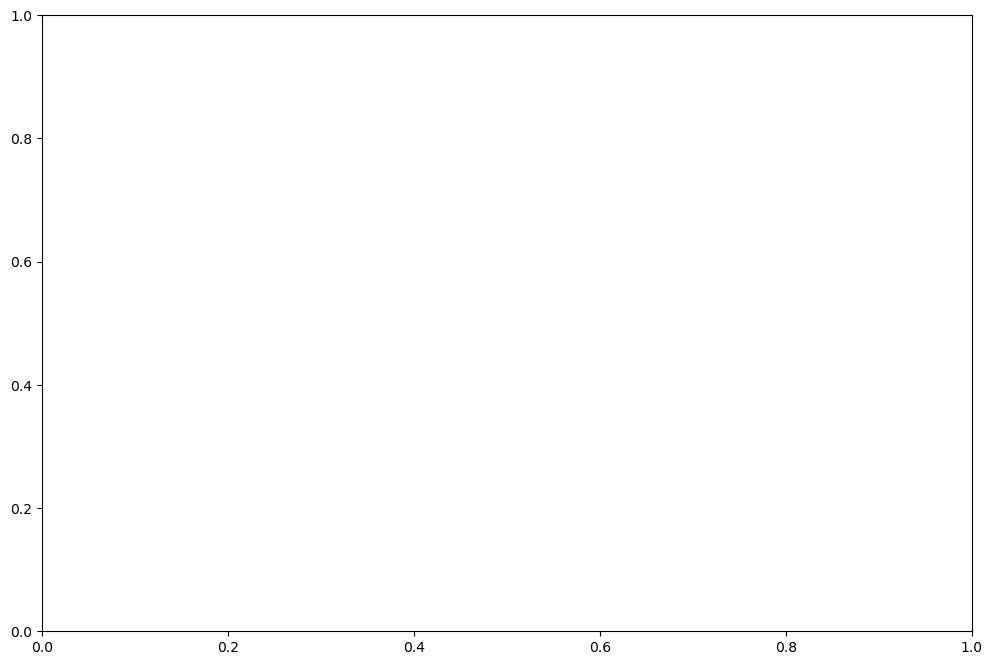

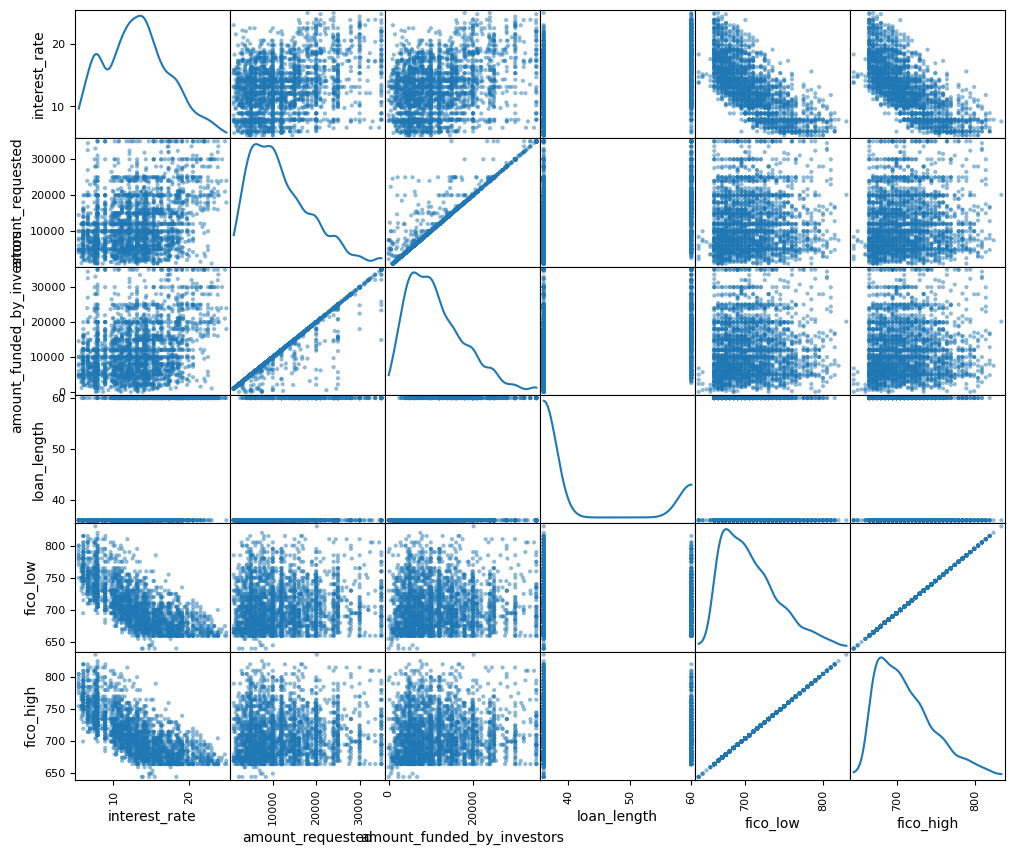

In [232]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,8));
scatter_matrix(df_clean_interest, diagonal='kde', figsize=(12,10));



In [233]:
df_clean_interest.describe()

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high
count,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000,2498.000000
mean,13.070368,12413.030424,12009.280661,41.265012,705.858687,709.858687
std,4.178007,7801.222483,7743.387861,9.933753,34.994039,34.994039
min,5.420000,1000.000000,-0.010000,36.000000,640.000000,644.000000
25%,10.160000,6000.000000,6000.000000,36.000000,680.000000,684.000000
50%,13.110000,10000.000000,10000.000000,36.000000,700.000000,704.000000
75%,15.800000,17000.000000,16000.000000,36.000000,725.000000,729.000000
max,24.890000,35000.000000,35000.000000,60.000000,830.000000,834.000000


In [ ]:
df_clean_interest

In [ ]:
# creating training and test dataframes and segmenting our X and y values

X = df_clean_interest[['amount_requested', 'amount_funded_by_investors', 'loan_length', 'fico_low', 'fico_high']]
y = df_clean_interest['interest_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [199]:
# Convert loan legth low(36) to 0 and loan length long(60) to 1
X_train['loan_time'] = (X_train['loan_length'] == 60.0).astype(int)
X_train

,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,loan_time
2059,30000.0,30000.00,60.0,720,724,1
228,18000.0,18000.00,60.0,665,669,1
1924,21850.0,21850.00,60.0,715,719,1
1829,28350.0,28350.00,36.0,695,699,0
452,7550.0,7550.00,36.0,730,734,0
...,...,...,...,...,...,...
657,8000.0,8000.00,36.0,710,714,0
1199,5000.0,5000.00,36.0,675,679,0
1653,5000.0,5000.00,36.0,720,724,0
937,9250.0,9250.00,36.0,685,689,0


In [200]:
# Convert loan legth low(36) to 0 and loan length long(60) to 1
X_test['loan_time'] = (X_test['loan_length'] == 60.0).astype(int)
X_test

,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,loan_time
1848,12800.0,12800.00,36.0,680,684,0
1698,4000.0,4000.00,36.0,705,709,0
1674,4800.0,4800.00,36.0,710,714,0
575,19000.0,19000.00,60.0,730,734,1
45,5000.0,5000.00,36.0,715,719,0
...,...,...,...,...,...,...
171,10000.0,10000.00,36.0,685,689,0
1198,12000.0,12000.00,36.0,665,669,0
1953,21000.0,21000.00,60.0,715,719,1
95,7000.0,7000.00,36.0,750,754,0


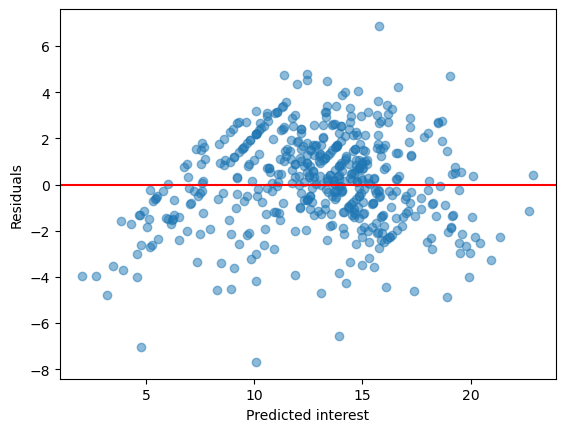

In [201]:
# setting initial model to see distrobution of training data

init_model = LinearRegression()

fit_init_model = init_model.fit(X_train, y_train)

predict_init_model = fit_init_model.predict(X_test)

residuals_int_model = predict_init_model - y_test

plt.scatter(x=predict_init_model, y=residuals_int_model, alpha=0.5)
plt.xlabel('Predicted interest')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r')
plt.show()

In [202]:
#r2_score of our predicted value
r2_score(y_test, predict_init_model, sample_weight=None, multioutput='uniform_average', force_finite=True)

0.7557164975239558

In [203]:
score_init_model = fit_init_model.score(X_test, y_test)
score_init_model

0.7557164975239558

In [204]:
#Scale our data for our training data
scaler = MinMaxScaler()

X_train_normal = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_train_normal

,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,loan_time
0,0.852941,0.857143,1.0,0.421053,0.421053,1.0
1,0.500000,0.514286,1.0,0.131579,0.131579,1.0
2,0.613235,0.624286,1.0,0.394737,0.394737,1.0
3,0.804412,0.810000,0.0,0.289474,0.289474,0.0
4,0.192647,0.215715,0.0,0.473684,0.473684,0.0
...,...,...,...,...,...,...
1993,0.205882,0.228572,0.0,0.368421,0.368421,0.0
1994,0.117647,0.142857,0.0,0.184211,0.184211,0.0
1995,0.117647,0.142857,0.0,0.421053,0.421053,0.0
1996,0.242647,0.264286,0.0,0.236842,0.236842,0.0


In [205]:
X_test_normal = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

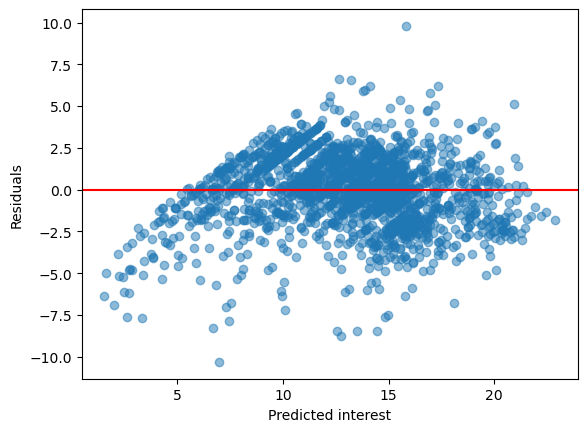

In [206]:
# model with scaled information
scale_model = LinearRegression()

fit_scale_model = scale_model.fit(X_train_normal, y_train)

predict_scale_model = fit_scale_model.predict(X_train_normal)

residuals_scale_model = predict_scale_model - y_train

plt.scatter(x=predict_scale_model, y=residuals_scale_model, alpha=0.5)
plt.xlabel('Predicted interest')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r')
plt.show()

In [207]:
new_model_score = fit_scale_model.score(X_train_normal, y_train)
new_model_score

0.7435742417052154

In [208]:
X_train_normal = X_train_normal.drop('fico_high', axis=1)
X_train_normal = X_train_normal.drop('loan_length', axis=1)
X_train_normal = X_train_normal.drop('loan_time', axis=1)

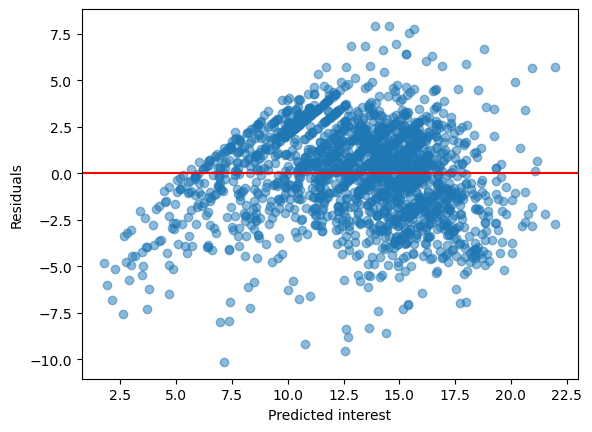

In [209]:
# model with scaled information, and drop fico_high column

scale_model = LinearRegression()

fit_scale_model = scale_model.fit(X_train_normal, y_train)

predict_scale_model = fit_scale_model.predict(X_train_normal)

residuals_scale_model = predict_scale_model - y_train

plt.scatter(x=predict_scale_model, y=residuals_scale_model, alpha=0.5)
plt.xlabel('Predicted interest')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r')
plt.show()

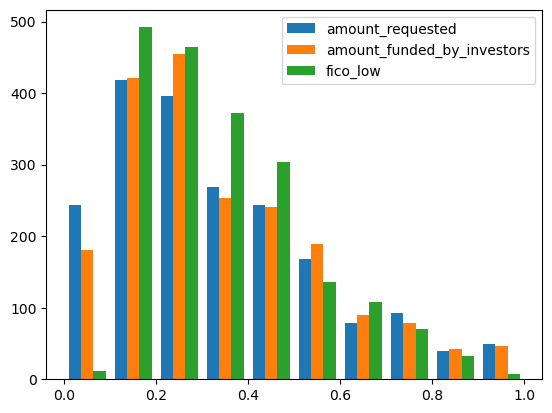

In [210]:
plt.hist(X_train_normal, bins=10, label= X_train_normal.columns)
plt.legend(loc='upper right')
plt.show()

C:\Users\Russe\AppData\Local\Temp\ipykernel_25968\2641035914.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(X_train_normal, labels=X_train_normal.columns);


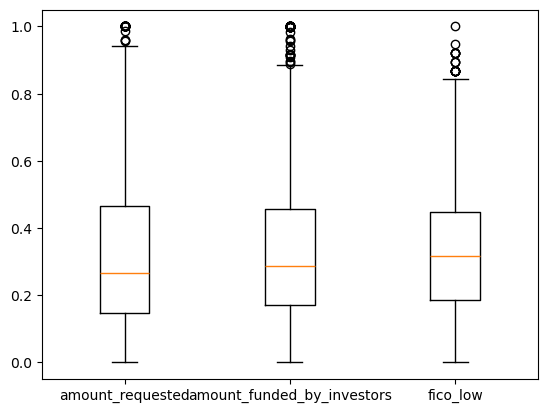

In [211]:
plt.boxplot(X_train_normal, labels=X_train_normal.columns);

In [212]:
X_train_normal

,amount_requested,amount_funded_by_investors,fico_low
0,0.852941,0.857143,0.421053
1,0.500000,0.514286,0.131579
2,0.613235,0.624286,0.394737
3,0.804412,0.810000,0.289474
4,0.192647,0.215715,0.473684
...,...,...,...
1993,0.205882,0.228572,0.368421
1994,0.117647,0.142857,0.184211
1995,0.117647,0.142857,0.421053
1996,0.242647,0.264286,0.236842


In [213]:
X_train_new = X_train_normal.copy()
X_train_new[['amount_requested', 'amount_funded_by_investors', 'fico_low']] = X_train_normal[X_train_normal[['amount_requested', 'amount_funded_by_investors', 'fico_low']] <= 0.85]
X_train_drop = X_train_new.dropna()
X_train_drop
# plt.boxplot(X_train_drop, labels=X_train_drop.columns);

,amount_requested,amount_funded_by_investors,fico_low
1,0.500000,0.514286,0.131579
2,0.613235,0.624286,0.394737
3,0.804412,0.810000,0.289474
4,0.192647,0.215715,0.473684
5,0.264706,0.285714,0.289474
...,...,...,...
1993,0.205882,0.228572,0.368421
1994,0.117647,0.142857,0.184211
1995,0.117647,0.142857,0.421053
1996,0.242647,0.264286,0.236842


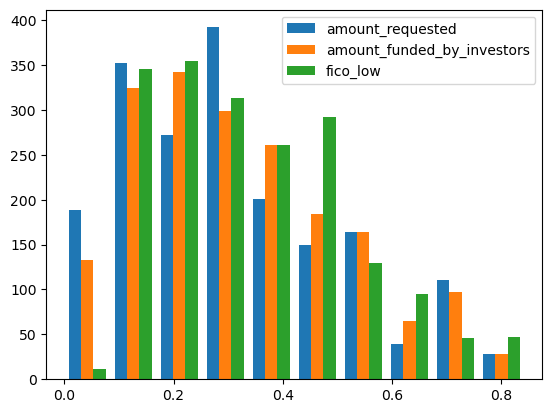

In [214]:
plt.hist(X_train_drop, bins=10, label= X_train_drop.columns)
plt.legend(loc='upper right')
plt.show()

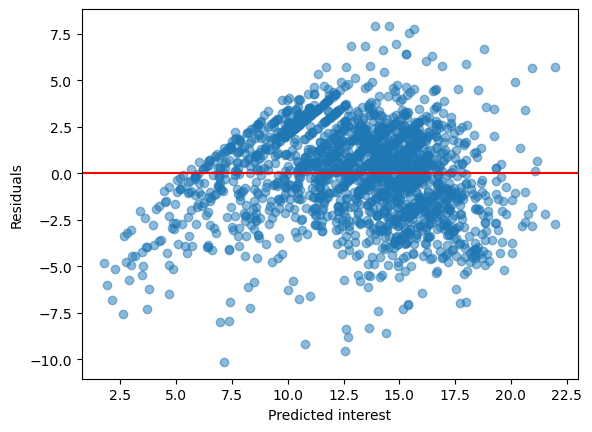

In [215]:
init_model = LinearRegression()

fit_init_model = init_model.fit(X_train_normal, y_train)

predict_init_model = fit_init_model.predict(X_train_normal)

residuals_int_model = predict_init_model - y_train

plt.scatter(x=predict_init_model, y=residuals_int_model, alpha=0.5)
plt.xlabel('Predicted interest')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r')
plt.show()

In [222]:
df_clean_interest['percent_unfunded'] =  1 - (df_clean_interest['amount_funded_by_investors'] / df_clean_interest['amount_requested'])
df_clean_interest['fico_average'] = (df_clean_interest['fico_high'] + df_clean_interest['fico_low']) / 2
df_clean_interest

,interest_rate,amount_requested,amount_funded_by_investors,loan_length,fico_low,fico_high,percent_unfunded,fico_average
0,8.90,20000.0,20000.00,36.0,735,739,0.000000,737.0
1,12.12,19200.0,19200.00,36.0,715,719,0.000000,717.0
2,21.98,35000.0,35000.00,60.0,690,694,0.000000,692.0
3,9.99,10000.0,9975.00,36.0,695,699,0.002500,697.0
4,11.71,12000.0,12000.00,36.0,695,699,0.000000,697.0
...,...,...,...,...,...,...,...,...
2493,16.77,30000.0,29950.00,60.0,705,709,0.001667,707.0
2494,14.09,16000.0,16000.00,60.0,740,744,0.000000,742.0
2495,13.99,10000.0,10000.00,36.0,680,684,0.000000,682.0
2496,12.42,6000.0,6000.00,36.0,675,679,0.000000,677.0


In [223]:
# using statsmodels
model = smf.ols(formula='interest_rate ~ amount_requested + amount_funded_by_investors + fico_average + percent_unfunded', data=df_clean_interest)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          interest_rate   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     1206.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:13:39   Log-Likelihood:                -5770.6
No. Observations:                2498   AIC:                         1.155e+04
Df Residuals:                    2493   BIC:                         1.158e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     73.2481      0.993     73.791      0.000      71.302      75.195
amount_requested               0.0002   4.73e-05      4.532      0.000       0.000       0.000
amount_funded_by_investors -2.813e-06   4.84e-05     -0.058      0.954   -9.77e-05    9.21e-05
fico_average                  -0.0887      0.001    -63.168      0.000      -0.091      -0.086
percent_unfunded              -1.6153      0.696     -2.319      0.020      -2.981      -0.250
==============================================================================
Omnibus:                       68.615   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               78.107
Skew:                           0.368   Prob(JB):                     1.09e-17
Kurtosis:                       3.456   Cond. No.                     4.17e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.17e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

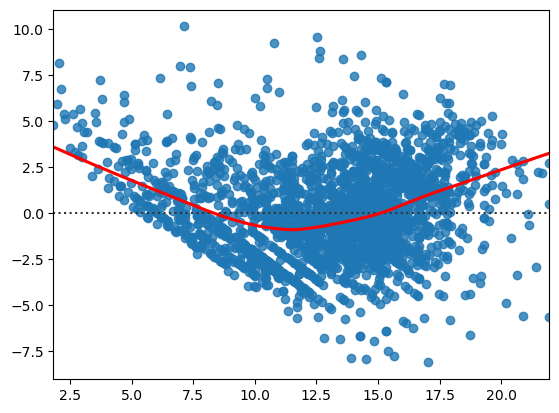

In [224]:
residuals = results.resid

sns.residplot(
        x=results.fittedvalues,
        y=residuals,
        lowess=True,
        line_kws={'color':'red'},
)

In [ ]:
# Top portion
# X_train_big = X_train_normal.copy()
# X_train_big = X_train_normal[X_train_normal[['amount_requested', 'amount_funded_by_investors', 'fico_low']] >= 0.85]
# # X_train_drop_big = X_train_big.dropna()
# X_train_big.replace(np.nan, 0)
# # plt.boxplot(X_train_drop_big, labels=X_train_drop_big.columns);

,amount_requested,amount_funded_by_investors,fico_low
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
1993,NaN,NaN,NaN
1994,NaN,NaN,NaN
1995,NaN,NaN,NaN
1996,NaN,NaN,NaN
